In [18]:
# Imports
import pandas
import numpy
from datetime import datetime
import matplotlib.pyplot as plt

In [19]:
# Import the CSV into df
df=pandas.read_csv('data.csv', sep=',',header=0)
df = df[:-1]

In [20]:
# Read birth date
df["year_of_birth"] = pandas.DatetimeIndex(df["BIRTH DATE"]).year.astype(int)

# Change all unknown locations of death to "Living"
df["LOCATION OF DEATH"].fillna('Alive', inplace=True)

# Creating variable "last_known_alive_date" to calculate lived_dates, months_lived and years_lived.
# This was done to include currently living Presidents as well, since their death dates come as NaN in the dataset.
today_date = datetime.now().strftime("%b %d, %Y")
df["last_known_alive_date"] = df["DEATH DATE"]
df["last_known_alive_date"].fillna(today_date, inplace=True)

# Calculating lived_dates, months_lived and years_lived
date_diff = pandas.DatetimeIndex(df["last_known_alive_date"]) - pandas.DatetimeIndex(df["BIRTH DATE"])
df["days_lived"] = (date_diff/ numpy.timedelta64(1, "D"))
df["months_lived"] = date_diff / numpy.timedelta64(1, "M")
df["years_lived"] = date_diff / numpy.timedelta64(1, "Y")

# Replace death date as living for death date is unknown.
df["DEATH DATE"].fillna('Alive', inplace=True)
df.style.hide(axis='index')
df.style.format(precision=0)

,PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,year_of_birth,last_known_alive_date,days_lived,months_lived,years_lived
0,George Washington,"Feb 22, 1732","Westmoreland Co., Va.","Dec 14, 1799","Mount Vernon, Va.",1732,"Dec 14, 1799",24767,799,68
1,John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",1735,"July 4, 1826",33119,1068,91
2,Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",1743,"July 4, 1826",30397,981,83
3,James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",1751,"June 28, 1836",31150,1005,85
4,James Monroe,"Apr 28, 1758","Westmoreland Co., Va.","July 4, 1831","New York, New York",1758,"July 4, 1831",26729,862,73
5,John Quincy Adams,"July 11, 1767","Quincy, Mass.","Feb 23, 1848","Washington, D.C.",1767,"Feb 23, 1848",29446,950,81
6,Andrew Jackson,"Mar 15, 1767","Waxhaws, No/So Carolina","June 8, 1845","Nashville, Tennessee",1767,"June 8, 1845",28574,922,78
7,Martin Van Buren,"Dec 5, 1782","Kinderhook, New York","July 24, 1862","Kinderhook, New York",1782,"July 24, 1862",29085,938,80
8,William Henry Harrison,"Feb 9, 1773","Charles City Co., Va.","Apr 4, 1841","Washington, D.C.",1773,"Apr 4, 1841",24890,803,68
9,John Tyler,"Mar 29, 1790","Charles City Co., Va.","Jan 18, 1862","Richmond, Va.",1790,"Jan 18, 1862",26227,846,72


In [4]:
# Helper function to style the living president
def show_alive(s):
    if s['DEATH DATE'] == 'Alive':
        return ['background-color: #FFDADA'] * len(s)
    else:
        return ['background-color: transparent'] * len(s)

In [5]:
# Sorting dataframe in desending order of days_lived and selecting top ten presidents
oldest_df = df.sort_values("days_lived", ascending=False).head(10)
oldest_df["years_lived"] = oldest_df["years_lived"].astype(int)
oldest_df.rename(columns={"years_lived": "AGE"}, inplace=True)

oldest_presidents = oldest_df.style
oldest_presidents.hide(axis="index")
oldest_presidents.hide(axis="columns",subset=["last_known_alive_date","year_of_birth", "days_lived", "months_lived"])
oldest_presidents.apply(show_alive, axis=1)
oldest_presidents.set_caption("Top 10 Presidents of the United States by age lived, oldest first")
oldest_presidents

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,AGE
Jimmy Carter,"Oct 1, 1924","Plains, Georgia",Alive,Alive,98
George Bush,"June 12, 1924","Milton, Mass.","Nov 30, 2018","Houston, Texas",94
Gerald Ford,"July 14, 1913","Omaha, Nebraska","Dec 26, 2006","Rancho Mirage, Cal.",93
Ronald Reagan,"Feb 6, 1911","Tampico, Illinois","June 5, 2004","Los Angeles, Cal.",93
John Adams,"Oct 30, 1735","Quincy, Mass.","July 4, 1826","Quincy, Mass.",90
Herbert Hoover,"Aug 10, 1874","West Branch, Iowa","Oct 20, 1964","New York, New York",90
Harry S. Truman,"May 8, 1884","Lamar, Missouri","Dec 26, 1972","Kansas City, Missouri",88
James Madison,"Mar 16, 1751","Port Conway, Va.","June 28, 1836","Orange Co., Va.",85
Thomas Jefferson,"Apr 13, 1743","Albemarle Co., Va.","July 4, 1826","Albemarle Co., Va.",83
Richard Nixon,"Jan 9, 1913","Yorba Linda, Cal.","Apr 22, 1994","New York, New York",81


In [6]:
# Sorting dataframe in ascending order of days_lived and selecting top ten presidents
youngest_presidents_df = df.sort_values("days_lived", ascending=True).head(10)
youngest_presidents_df["years_lived"] = youngest_presidents_df["years_lived"].astype(int)
youngest_presidents_df.rename(columns={"years_lived": "AGE"}, inplace=True)

youngest_presidents = youngest_presidents_df.style
youngest_presidents.hide(axis="index")
youngest_presidents.hide(axis="columns",subset=["last_known_alive_date", "year_of_birth", "months_lived", "days_lived"])
youngest_presidents.apply(show_alive, axis=1)
youngest_presidents.set_caption("Top 10 Presidents of the United States by age lived, youngest first")
youngest_presidents

PRESIDENT,BIRTH DATE,BIRTH PLACE,DEATH DATE,LOCATION OF DEATH,AGE
John F. Kennedy,"May 29, 1917","Brookline, Mass.","Nov 22, 1963","Dallas, Texas",46
James A. Garfield,"Nov 19, 1831","Cuyahoga Co., Ohio","Sep 19, 1881","Elberon, New Jersey",49
James K. Polk,"Nov 2, 1795","Mecklenburg Co., N.C.","June 15, 1849","Nashville, Tennessee",53
Abraham Lincoln,"Feb 12, 1809","LaRue Co., Kentucky","Apr 15, 1865","Washington, D.C.",56
Chester Arthur,"Oct 5, 1829","Fairfield, Vermont","Nov 18, 1886","New York, New York",57
Warren G. Harding,"Nov 2, 1865","Morrow County, Ohio","Aug 2, 1923","San Francisco, Cal.",57
William McKinley,"Jan 29, 1843","Niles, Ohio","Sep 14, 1901","Buffalo, New York",58
Theodore Roosevelt,"Oct 27, 1858","New York, New York","Jan 6, 1919","Oyster Bay, New York",60
Calvin Coolidge,"July 4, 1872","Plymouth, Vermont","Jan 5, 1933","Northampton, Mass.",60
Barack Obama,"Aug 4, 1961","Honolulu, Hawaii",Alive,Alive,61


In [7]:
# Extracting necessary cols
days_lived_col = df["days_lived"]
years_lived_col = df["years_lived"].astype(int)
value_counts = years_lived_col.value_counts()

# Calculating weights
weights = []
for i in range(len(years_lived_col)):
    year = years_lived_col[i]
    # Using the frequency of a year as the weight
    weights.append(value_counts[year])
weights = numpy.array(weights)
# Getting weighted values
weighted_values = weights * days_lived_col

# Calculating the statistics
mean = days_lived_col.mean()
weighted_mean = weighted_values.sum() / weights.sum()
median = days_lived_col.median()
mode = years_lived_col.mode() * 365
max = days_lived_col.max()
min = days_lived_col.min()
std = days_lived_col.std()

# Tabularizing by appending everything to a dictionary
data = {
    "Statistic": ["Mean Age", "Weighted Mean Age", "Median Age", "Mode Age", "Maximum Age", "Minimum Age", "Standard Deviation"],
    "Age (Days)": [mean, weighted_mean, median, list(mode), max, min, std],
    "Age (Years)": [mean / 365, weighted_mean / 365, median / 365, [x / 365 for x in list(mode)], max / 365, min / 365, std / 365]
}

# Creating df from the dictionary
df_stats = pandas.DataFrame.from_dict(data)
df_stats.style.hide(axis="index")

Statistic,Age (Days),Age (Years)
Mean Age,26377.454545,72.266999
Weighted Mean Age,26390.958333,72.303995
Median Age,26128.500000,71.584932
Mode Age,"[24455, 27740]","[67.0, 76.0]"
Maximum Age,36028.000000,98.706849
Minimum Age,16978.000000,46.515068
Standard Deviation,4630.558545,12.686462


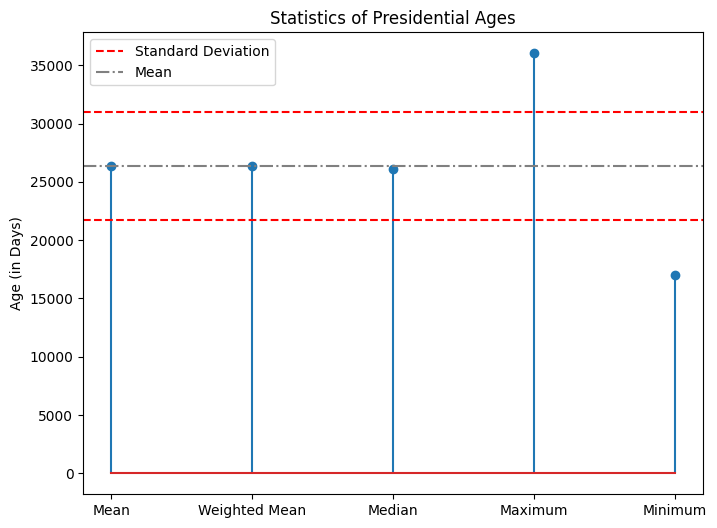

In [8]:
# Plot Statistics of Presidential Ages
x_axis = ["Mean", "Weighted Mean", "Median", "Maximum", "Minimum"]
x_axis_positions = range(len(x_axis))
y_axis = [mean, weighted_mean, median, max, min]
plt.figure(figsize=(8, 6))
plt.stem(x_axis_positions, y_axis)
plt.ylabel("Age (in Days)")
plt.title("Statistics of Presidential Ages")

plt.axhline(y = mean + std, color = 'r', linestyle = '--', label='Standard Deviation')
plt.axhline(y = mean, color = 'gray', linestyle = '-.', label='Mean')
plt.axhline(y = mean - std, color = 'r', linestyle = '--')

plt.legend(labels=['Standard Deviation', 'Mean'])

plt.xticks(x_axis_positions, x_axis)
plt.show()

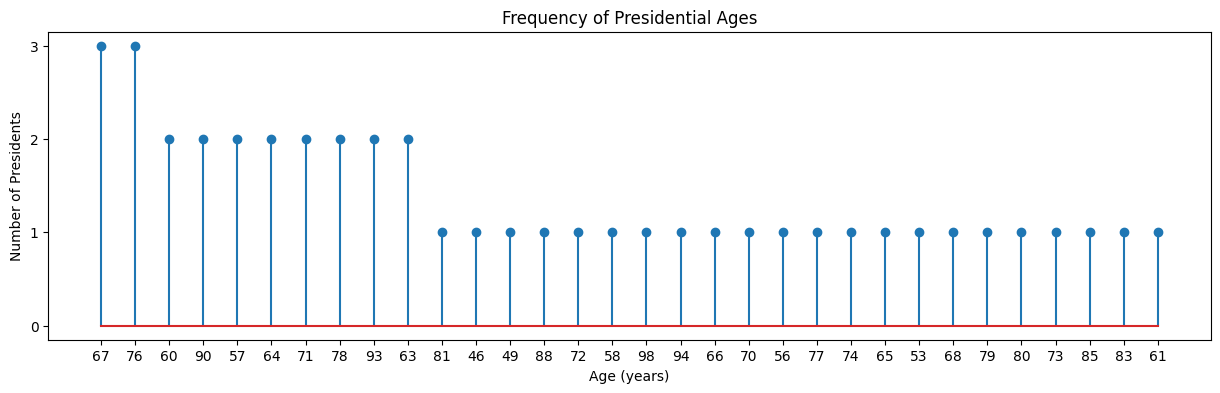

In [9]:
# Plot Frequency of Presidential Ages
x_axis_positions = [i for i in range(len(value_counts))]
plt.figure(figsize=(15, 4))
plt.stem(x_axis_positions, value_counts)
plt.xlabel("Age (years)")
plt.ylabel("Number of Presidents")
plt.title("Frequency of Presidential Ages")

plt.xticks(x_axis_positions, value_counts.keys())
plt.yticks(range(value_counts.max() + 1))
plt.show()